#Long Short-Term Memory Network
The Long Short-Term Memory network, or LSTM network, is a recurrent neural network trained using Backpropagation Through Time that overcomes the vanishing gradient problem.
There are three types of gates within a unit:

###Forget Gate: conditionally decides what information to throw away from the block
###Input Gate: conditionally decides which values from the input to update the memory state
###Output Gate: conditionally decides what to output based on input and the memory of the block

In [ ]:
# LSTM for international airline passengers problem with time step regression framing
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# load the dataset
dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

The function takes two arguments: the dataset, which is a NumPy array you want to convert into a dataset, and the look_back, which is the number of previous time steps to use as input variables to predict the next time period—in this case, defaulted to 1.

This default will create a dataset where X is the number of passengers at a given time (t), and Y is the number of passengers at the next time (t + 1).

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
 # fix random seed for reproducibility
tf.random.set_seed(7)

# Training Data

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# RNN Modeling


The network has a visible layer with 1 input, a hidden layer with 4 LSTM blocks or neurons, and an output layer that makes a single value prediction. The default sigmoid activation function is used for the LSTM blocks. The network is trained for 100 epochs, and a batch size of 1 is used.

### LSTM network!

An epoch is a term used in machine learning and indicates the number of passes of the entire training dataset the machine learning algorithm has completed

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1)) #Hidden layer
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)#verbose is the choice that how you want to see the output of your Neural Network while it's training. 

Epoch 1/100
94/94 - 2s - loss: 0.0431 - 2s/epoch - 18ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0229 - 156ms/epoch - 2ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0163 - 155ms/epoch - 2ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0148 - 164ms/epoch - 2ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0140 - 173ms/epoch - 2ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0130 - 154ms/epoch - 2ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0121 - 160ms/epoch - 2ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0112 - 150ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0104 - 250ms/epoch - 3ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0094 - 241ms/epoch - 3ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0084 - 256ms/epoch - 3ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0074 - 205ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0066 - 184ms/epoch - 2ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0057 - 148ms/epoch - 2ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0050 - 153ms/epoch - 2ms/step
Epoch 16/100
94/94 - 0s - loss: 0.0043 - 160ms/epoc

#Prediction


In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [ ]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.68 RMSE
Test Score: 49.34 RMSE


## Prediction & Plotting

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [ ]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

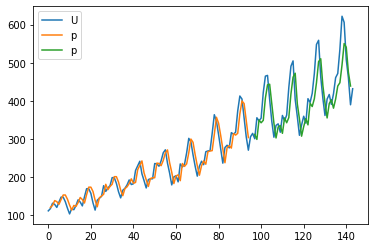

In [ ]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend("Upper Left")
plt.show()

You can see that the model has an average error of about 23 passengers (in thousands) on the training dataset and about 49 passengers (in thousands) on the test dataset. 